In [6]:
import pandas as pd
pd.set_option("display.max_columns", 40)
pd.set_option("display.width", 1000)
pd.set_option("max.colwidth", 100)

In [7]:
"""
A FAZERES:
- Fazer merge com as cidades, que está na cd ugestora - 3 ultimos digitos para receber nova base com o tradutor!!!
- Utilizar zfill(x)
- População
- Proponentes únicos
"""

'\nA FAZERES:\n- Fazer merge com as cidades, que está na cd ugestora - 3 ultimos digitos para receber nova base com o tradutor!!!\n- Utilizar zfill(x)\n- População\n- Proponentes únicos\n'

In [8]:
licitacoes = pd.read_csv("../data/TCE-PB-Portal-Gestor-Licitacoes_Propostas.txt", sep = "|")
tradutor = pd.read_csv("../data/tcepb_tradutor_ug.csv", encoding = "latin", sep = ";", names = ["cod_mundv", "idmun_tce"], skiprows= 1)
mun = pd.read_csv("../data/dtb_municipios.csv", encoding = "latin", sep = ";")

/var/folders/48/3p26d_ds0vl0fbwqp5n9rtnc0000gn/T/ipykernel_2308/768658066.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  licitacoes = pd.read_csv("../data/TCE-PB-Portal-Gestor-Licitacoes_Propostas.txt", sep = "|")


In [9]:
licitacoes.head()

,protocolo_licitacao,numero_licitacao,nome_modalidade_licitacao,nome_municipio,cd_ugestora,jurisdicionado_id,nome_jurisdicionado,nome_tipo_jurisdicionado,nome_tipo_administracao_jurisdicionado,nome_esfera_jurisdicionado,objeto_licitacao,valor_estimado_licitacao,valor_licitado_licitacao,data_homologacao_licitacao,ano_homologacao_licitacao,situacao_fracassada_licitacao,nome_proponente,cpf_cnpj_proponente,valor_proposta,situacao_proposta,nome_estagio_processual_licitacao,nome_setor_atual_licitacao,url
0,Doc. 00625/14,00001/2014,Pregão Presencial (Lei Nº 10.520/2002),NaN,50001,897,Tribunal de Justiça,Poder / Órgão Independente,Direta,Estadual,Locação de equipamentos para o sistema de visualização das sessões do Tribunal Pleno com gravaçã...,81600.0,75600.0,14/02/2014,2014.0,Não,APEL - Aplicações Eletrônicas Industria e Comércio LTDA,08991515000102,78000.0,Vencedora,Formalizado,ACERVO DIGITAL,https://tramita.tce.pb.gov.br/tramita/consultatramitacao?documento=00625_14
1,Doc. 00707/14,00001/2014,Pregão Presencial (Lei Nº 10.520/2002),Desterro,201073,658,Prefeitura Municipal de Desterro,Prefeitura,Direta,Municipal,"Aquisição de 04 (quatro) Carretas Basculante hidráulica, com molas, com rodas e pneus, com carro...",60000.0,54000.0,20/01/2014,2014.0,Não,Veneza Maquinas Comercio Ltda,06824439000204,54000.0,Vencedora,Formalizado,ACERVO DIGITAL,https://tramita.tce.pb.gov.br/tramita/consultatramitacao?documento=00707_14
2,Doc. 00714/14,00001/2014,Pregão Presencial (Lei Nº 10.520/2002),Juru,201100,686,Prefeitura Municipal de Juru,Prefeitura,Direta,Municipal,Contratação de empresa para aquisição de combustíveis e óleos lubrificantes destinados a frota d...,500000.0,596300.0,24/01/2014,2014.0,Não,COMERCIAL DE COMBUSTIVEIS NORDESTE,09382946000134,137400.0,Vencedora,Formalizado,ACERVO DIGITAL,https://tramita.tce.pb.gov.br/tramita/consultatramitacao?documento=00714_14
3,Doc. 00714/14,00001/2014,Pregão Presencial (Lei Nº 10.520/2002),Juru,201100,686,Prefeitura Municipal de Juru,Prefeitura,Direta,Municipal,Contratação de empresa para aquisição de combustíveis e óleos lubrificantes destinados a frota d...,500000.0,596300.0,24/01/2014,2014.0,Não,CESAR POSTO,00188092000185,351900.0,Vencedora,Formalizado,ACERVO DIGITAL,https://tramita.tce.pb.gov.br/tramita/consultatramitacao?documento=00714_14
4,Doc. 00714/14,00001/2014,Pregão Presencial (Lei Nº 10.520/2002),Juru,201100,686,Prefeitura Municipal de Juru,Prefeitura,Direta,Municipal,Contratação de empresa para aquisição de combustíveis e óleos lubrificantes destinados a frota d...,500000.0,596300.0,24/01/2014,2014.0,Não,RI COMERCIO DE DERIVADOS DE PETROLEO,03562340000102,104000.0,Vencedora,Formalizado,ACERVO DIGITAL,https://tramita.tce.pb.gov.br/tramita/consultatramitacao?documento=00714_14


In [10]:
licitacoes.info()

# nome_municipio: alguns como nan por causa de certas esferas de jurisdição não serem municipais;

# valor estimado em nan por falta de obrigação da especificação do valor nos editais e em casos de ser R$ 0,00
#  por caso de aderencia da unidade gestora: nestes casos, não é a ud que realiza o pregão, mas sim há a aderência por parte dela à licitação;

# valor licitado como nan por falta de aparecimento de empresas para oferecerem o produto ou serviço licitado; Como 0 por erros,
# Ou por serem naquele estilo que alessio falou, a empresa vai ganhar no serviço.


# Em casos de data de homologação como nan, temos que a licitação foi fracassada, ou a empresa perdeu;

# OBSERVAÇÃO: OS NOMES PROPONENTES PODEM SER EMPRESAS ( E CONSEQUENTEMENTE CADASTRADOS COM CNPJ) OU PESSOAS QUE REPRESENTAM A EMPRESA (PESSOA FÍSICA)
# Em casos de nomes proponentes faltando, apenas erros;
# Em casos de cnpj/cpf faltante, erros de digitação.
# valor da proposta 

# 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442164 entries, 0 to 442163
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   protocolo_licitacao                     442164 non-null  object 
 1   numero_licitacao                        442164 non-null  object 
 2   nome_modalidade_licitacao               442164 non-null  object 
 3   nome_municipio                          385863 non-null  object 
 4   cd_ugestora                             442164 non-null  int64  
 5   jurisdicionado_id                       442164 non-null  int64  
 6   nome_jurisdicionado                     442164 non-null  object 
 7   nome_tipo_jurisdicionado                442164 non-null  object 
 8   nome_tipo_administracao_jurisdicionado  442164 non-null  object 
 9   nome_esfera_jurisdicionado              442164 non-null  object 
 10  objeto_licitacao                        4421

In [11]:
mun

,index,ano,cod_regiao,nome_regiao,cod_uf,nome_uf,cod_meso,nome_meso,cod_micro,nome_micro,cod_mun,cod_mundv,nome_mun
0,1,2015,1,Norte,11,Rondônia,1102,Leste Rondoniense,11006,Cacoal,110001,1100015,Alta Floresta D'Oeste
1,2,2015,1,Norte,11,Rondônia,1102,Leste Rondoniense,11006,Cacoal,110037,1100379,Alto Alegre dos Parecis
2,3,2015,1,Norte,11,Rondônia,1102,Leste Rondoniense,11003,Ariquemes,110040,1100403,Alto Paraíso
3,4,2015,1,Norte,11,Rondônia,1102,Leste Rondoniense,11005,Alvorada D'Oeste,110034,1100346,Alvorada D'Oeste
4,5,2015,1,Norte,11,Rondônia,1102,Leste Rondoniense,11003,Ariquemes,110002,1100023,Ariquemes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,5566,2015,5,Centro-Oeste,52,Goiás,5205,Sul Goiano,52016,Pires do Rio,522200,5222005,Vianópolis
5566,5567,2015,5,Centro-Oeste,52,Goiás,5205,Sul Goiano,52015,Meia Ponte,522205,5222054,Vicentinópolis
5567,5568,2015,5,Centro-Oeste,52,Goiás,5204,Leste Goiano,52012,Entorno de Brasília,522220,5222203,Vila Boa
5568,5569,2015,5,Centro-Oeste,52,Goiás,5204,Leste Goiano,52012,Entorno de Brasília,522230,5222302,Vila Propício


In [12]:
tradutor

,cod_mundv,idmun_tce
0,2500106,1
1,2500205,2
2,2500304,3
3,2500403,4
4,2500502,5
...,...,...
219,2517001,219
220,2517100,220
221,2517209,221
222,2517407,223


## Tentando encontrar outliers para cima já que para baixo, até valores com 0 existem...

In [13]:
IQ = licitacoes["valor_licitado_licitacao"].quantile(.25)
IIIQ = licitacoes["valor_licitado_licitacao"].quantile(.75)

IIQ = IIIQ - IQ

limitesup = IIIQ + 1.5 * IIQ
limiteinf = IQ - 1.5 * IIQ

In [14]:
import seaborn as sns

<Axes: xlabel='valor_licitado_licitacao'>

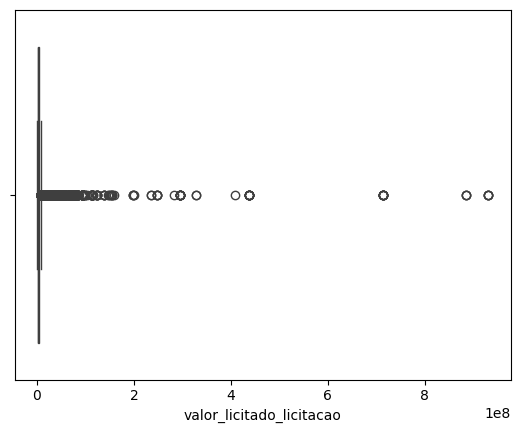

In [15]:
# Podemos analisar a linha de cada um destes valores destoantes para ver se há alguma inconsistência nos valores

dados_acima = licitacoes.query("valor_licitado_licitacao > @limitesup")

sns.boxplot(data = dados_acima, x = "valor_licitado_licitacao")

In [16]:
mun["ano"] = mun["ano"].astype(int)
mun["cod_regiao"] = mun["cod_regiao"].astype(int)
mun["cod_uf"] = mun["cod_uf"].astype(int)
mun["cod_meso"] = mun["cod_meso"].astype(int)
mun["cod_micro"] = mun["cod_micro"].astype(int)
mun["cod_mun"] = mun["cod_mun"].astype(int)
mun["cod_mundv"] = mun["cod_mundv"].astype(int)

In [17]:
mun

,index,ano,cod_regiao,nome_regiao,cod_uf,nome_uf,cod_meso,nome_meso,cod_micro,nome_micro,cod_mun,cod_mundv,nome_mun
0,1,2015,1,Norte,11,Rondônia,1102,Leste Rondoniense,11006,Cacoal,110001,1100015,Alta Floresta D'Oeste
1,2,2015,1,Norte,11,Rondônia,1102,Leste Rondoniense,11006,Cacoal,110037,1100379,Alto Alegre dos Parecis
2,3,2015,1,Norte,11,Rondônia,1102,Leste Rondoniense,11003,Ariquemes,110040,1100403,Alto Paraíso
3,4,2015,1,Norte,11,Rondônia,1102,Leste Rondoniense,11005,Alvorada D'Oeste,110034,1100346,Alvorada D'Oeste
4,5,2015,1,Norte,11,Rondônia,1102,Leste Rondoniense,11003,Ariquemes,110002,1100023,Ariquemes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,5566,2015,5,Centro-Oeste,52,Goiás,5205,Sul Goiano,52016,Pires do Rio,522200,5222005,Vianópolis
5566,5567,2015,5,Centro-Oeste,52,Goiás,5205,Sul Goiano,52015,Meia Ponte,522205,5222054,Vicentinópolis
5567,5568,2015,5,Centro-Oeste,52,Goiás,5204,Leste Goiano,52012,Entorno de Brasília,522220,5222203,Vila Boa
5568,5569,2015,5,Centro-Oeste,52,Goiás,5204,Leste Goiano,52012,Entorno de Brasília,522230,5222302,Vila Propício


In [18]:
dados_acima.query( "200000000 < valor_licitado_licitacao< 800000000").head()

,protocolo_licitacao,numero_licitacao,nome_modalidade_licitacao,nome_municipio,cd_ugestora,jurisdicionado_id,nome_jurisdicionado,nome_tipo_jurisdicionado,nome_tipo_administracao_jurisdicionado,nome_esfera_jurisdicionado,objeto_licitacao,valor_estimado_licitacao,valor_licitado_licitacao,data_homologacao_licitacao,ano_homologacao_licitacao,situacao_fracassada_licitacao,nome_proponente,cpf_cnpj_proponente,valor_proposta,situacao_proposta,nome_estagio_processual_licitacao,nome_setor_atual_licitacao,url
123023,Proc. 14157/17,00001/2017,Chamada Pública,NaN,220001,15670,Secretaria de Estado da Educação - SEE,Secretaria de Estado,Direta,Estadual,"Seleção de organização social qualificada na área de educação, no âmbito do Estado da Paraíba, p...",248180302.8,2.343389e+08,26/07/2017,2017.0,Não,o INSTITUTO NACIONAL DE PESQUISA E GESTÃO EM SAÚDE - INSAÚDE,44563716000172,1.170563e+08,Vencedora,Finalizado,ARQUIVO DIGITAL,https://tramita.tce.pb.gov.br/tramita/consultatramitacao?processo=14157_17
123024,Proc. 14157/17,00001/2017,Chamada Pública,NaN,220001,15670,Secretaria de Estado da Educação - SEE,Secretaria de Estado,Direta,Estadual,"Seleção de organização social qualificada na área de educação, no âmbito do Estado da Paraíba, p...",248180302.8,2.343389e+08,26/07/2017,2017.0,Não,ESPAÇO CIDADANIA E OPORTUNIDADES SOCIAIS - ECOS,02539959000125,1.172826e+08,Vencedora,Finalizado,ARQUIVO DIGITAL,https://tramita.tce.pb.gov.br/tramita/consultatramitacao?processo=14157_17
126814,Proc. 16531/17,00213/2017,Pregão Presencial (Lei Nº 10.520/2002),NaN,190001,817,Secretaria de Estado da Administração,Secretaria de Estado,Direta,Estadual,"CONTRATAÇÃO DE INSTITUIÇÃO FINANCEIRA PARA PRESTAÇÃO DOS SERVIÇOS DE (I) PAGAMENTO, COM EXCLUSIV...",220000000.0,2.005000e+08,29/09/2017,2017.0,Não,BANCO BRADESCO S/A,60746948000112,2.005000e+08,Vencedora,Finalizado,ARQUIVO DIGITAL,https://tramita.tce.pb.gov.br/tramita/consultatramitacao?processo=16531_17
132448,Proc. 20874/17,00002/2017,Concorrência (Lei Nº 8.666/1993),NaN,310101,283,Departamento de Estradas de Rodagem,Autarquia,Indireta,Estadual,Seleção de empresas ou consórcio de empresas para a concessão e exploração do Serviço Regular In...,328158246.0,3.281582e+08,14/12/2017,2017,Não,EMPRESA NACIONAL DE PASSAGEIROS LTDA.,09379165000190,1.791141e+08,Vencedora,Decisão Publicada,ARQUIVO DIGITAL,https://tramita.tce.pb.gov.br/tramita/consultatramitacao?processo=20874_17
132449,Proc. 20874/17,00002/2017,Concorrência (Lei Nº 8.666/1993),NaN,310101,283,Departamento de Estradas de Rodagem,Autarquia,Indireta,Estadual,Seleção de empresas ou consórcio de empresas para a concessão e exploração do Serviço Regular In...,328158246.0,3.281582e+08,14/12/2017,2017,Não,TRANSNACIONAL - TRANSPORTES NACIONAL DE PASSAGEIROS LTDA,12613006000113,1.490441e+08,Vencedora,Decisão Publicada,ARQUIVO DIGITAL,https://tramita.tce.pb.gov.br/tramita/consultatramitacao?processo=20874_17


In [19]:
dados_acima.query("valor_licitado_licitacao > 600000000")

""""
Nestes casos, fazendo a soma das propostas das empresas que obtiveram êxito na licitação,
percebe-se que o valor licitado foi computado de forma errada.
"""

'"\nNestes casos, fazendo a soma das propostas das empresas que obtiveram êxito na licitação,\npercebe-se que o valor licitado foi computado de forma errada.\n'

## REALIZANDO A JUNÇÃO DOS DADOS COM OS DE POPULAÇÃO!

In [20]:
licitacoes.head(1)

,protocolo_licitacao,numero_licitacao,nome_modalidade_licitacao,nome_municipio,cd_ugestora,jurisdicionado_id,nome_jurisdicionado,nome_tipo_jurisdicionado,nome_tipo_administracao_jurisdicionado,nome_esfera_jurisdicionado,objeto_licitacao,valor_estimado_licitacao,valor_licitado_licitacao,data_homologacao_licitacao,ano_homologacao_licitacao,situacao_fracassada_licitacao,nome_proponente,cpf_cnpj_proponente,valor_proposta,situacao_proposta,nome_estagio_processual_licitacao,nome_setor_atual_licitacao,url
0,Doc. 00625/14,00001/2014,Pregão Presencial (Lei Nº 10.520/2002),NaN,50001,897,Tribunal de Justiça,Poder / Órgão Independente,Direta,Estadual,Locação de equipamentos para o sistema de visualização das sessões do Tribunal Pleno com gravaçã...,81600.0,75600.0,14/02/2014,2014.0,Não,APEL - Aplicações Eletrônicas Industria e Comércio LTDA,08991515000102,78000.0,Vencedora,Formalizado,ACERVO DIGITAL,https://tramita.tce.pb.gov.br/tramita/consultatramitacao?documento=00625_14


In [21]:
mun.head(1)

,index,ano,cod_regiao,nome_regiao,cod_uf,nome_uf,cod_meso,nome_meso,cod_micro,nome_micro,cod_mun,cod_mundv,nome_mun
0,1,2015,1,Norte,11,Rondônia,1102,Leste Rondoniense,11006,Cacoal,110001,1100015,Alta Floresta D'Oeste


In [22]:
tradutor["idmun_tce"] = tradutor["idmun_tce"].astype(str).str.zfill(3)

In [23]:
tradutor["idmun_tce"] = tradutor["idmun_tce"].astype(int)

In [24]:
tradutor

,cod_mundv,idmun_tce
0,2500106,1
1,2500205,2
2,2500304,3
3,2500403,4
4,2500502,5
...,...,...
219,2517001,219
220,2517100,220
221,2517209,221
222,2517407,223


In [25]:
licitacoes = licitacoes.assign(
    idmun_tce = lambda x: x["cd_ugestora"].astype(str).str.zfill(6).str.slice(3, 7).astype(int)
)

licitacoes = licitacoes.merge(tradutor, how = "left")

In [26]:
licitacoes["cod_mundv"] = licitacoes["cod_mundv"].fillna(0)

In [27]:
licitacoes["cod_mundv"] = licitacoes["cod_mundv"].astype(int)

In [28]:
licitacoes = licitacoes.merge(mun, how = "left")

licitacoes.head()

,protocolo_licitacao,numero_licitacao,nome_modalidade_licitacao,nome_municipio,cd_ugestora,jurisdicionado_id,nome_jurisdicionado,nome_tipo_jurisdicionado,nome_tipo_administracao_jurisdicionado,nome_esfera_jurisdicionado,objeto_licitacao,valor_estimado_licitacao,valor_licitado_licitacao,data_homologacao_licitacao,ano_homologacao_licitacao,situacao_fracassada_licitacao,nome_proponente,cpf_cnpj_proponente,valor_proposta,situacao_proposta,nome_estagio_processual_licitacao,nome_setor_atual_licitacao,url,idmun_tce,cod_mundv,index,ano,cod_regiao,nome_regiao,cod_uf,nome_uf,cod_meso,nome_meso,cod_micro,nome_micro,cod_mun,nome_mun
0,Doc. 00625/14,00001/2014,Pregão Presencial (Lei Nº 10.520/2002),NaN,50001,897,Tribunal de Justiça,Poder / Órgão Independente,Direta,Estadual,Locação de equipamentos para o sistema de visualização das sessões do Tribunal Pleno com gravaçã...,81600.0,75600.0,14/02/2014,2014.0,Não,APEL - Aplicações Eletrônicas Industria e Comércio LTDA,08991515000102,78000.0,Vencedora,Formalizado,ACERVO DIGITAL,https://tramita.tce.pb.gov.br/tramita/consultatramitacao?documento=00625_14,1,2500106,1243.0,2015.0,2.0,Nordeste,25.0,Paraíba,2501.0,Sertão Paraibano,25007.0,Serra do Teixeira,250010.0,Água Branca
1,Doc. 00707/14,00001/2014,Pregão Presencial (Lei Nº 10.520/2002),Desterro,201073,658,Prefeitura Municipal de Desterro,Prefeitura,Direta,Municipal,"Aquisição de 04 (quatro) Carretas Basculante hidráulica, com molas, com rodas e pneus, com carro...",60000.0,54000.0,20/01/2014,2014.0,Não,Veneza Maquinas Comercio Ltda,06824439000204,54000.0,Vencedora,Formalizado,ACERVO DIGITAL,https://tramita.tce.pb.gov.br/tramita/consultatramitacao?documento=00707_14,73,2505402,1314.0,2015.0,2.0,Nordeste,25.0,Paraíba,2501.0,Sertão Paraibano,25007.0,Serra do Teixeira,250540.0,Desterro
2,Doc. 00714/14,00001/2014,Pregão Presencial (Lei Nº 10.520/2002),Juru,201100,686,Prefeitura Municipal de Juru,Prefeitura,Direta,Municipal,Contratação de empresa para aquisição de combustíveis e óleos lubrificantes destinados a frota d...,500000.0,596300.0,24/01/2014,2014.0,Não,COMERCIAL DE COMBUSTIVEIS NORDESTE,09382946000134,137400.0,Vencedora,Formalizado,ACERVO DIGITAL,https://tramita.tce.pb.gov.br/tramita/consultatramitacao?documento=00714_14,100,2508000,1342.0,2015.0,2.0,Nordeste,25.0,Paraíba,2501.0,Sertão Paraibano,25007.0,Serra do Teixeira,250800.0,Juru
3,Doc. 00714/14,00001/2014,Pregão Presencial (Lei Nº 10.520/2002),Juru,201100,686,Prefeitura Municipal de Juru,Prefeitura,Direta,Municipal,Contratação de empresa para aquisição de combustíveis e óleos lubrificantes destinados a frota d...,500000.0,596300.0,24/01/2014,2014.0,Não,CESAR POSTO,00188092000185,351900.0,Vencedora,Formalizado,ACERVO DIGITAL,https://tramita.tce.pb.gov.br/tramita/consultatramitacao?documento=00714_14,100,2508000,1342.0,2015.0,2.0,Nordeste,25.0,Paraíba,2501.0,Sertão Paraibano,25007.0,Serra do Teixeira,250800.0,Juru
4,Doc. 00714/14,00001/2014,Pregão Presencial (Lei Nº 10.520/2002),Juru,201100,686,Prefeitura Municipal de Juru,Prefeitura,Direta,Municipal,Contratação de empresa para aquisição de combustíveis e óleos lubrificantes destinados a frota d...,500000.0,596300.0,24/01/2014,2014.0,Não,RI COMERCIO DE DERIVADOS DE PETROLEO,03562340000102,104000.0,Vencedora,Formalizado,ACERVO DIGITAL,https://tramita.tce.pb.gov.br/tramita/consultatramitacao?documento=00714_14,100,2508000,1342.0,2015.0,2.0,Nordeste,25.0,Paraíba,2501.0,Sertão Paraibano,25007.0,Serra do Teixeira,250800.0,Juru


In [29]:
licitacoes = licitacoes.assign(
    id = lambda x: x["url"].str.slice(67, 75)
)

licitacoes.query("valor_licitado_licitacao == 328158246.0")

,protocolo_licitacao,numero_licitacao,nome_modalidade_licitacao,nome_municipio,cd_ugestora,jurisdicionado_id,nome_jurisdicionado,nome_tipo_jurisdicionado,nome_tipo_administracao_jurisdicionado,nome_esfera_jurisdicionado,objeto_licitacao,valor_estimado_licitacao,valor_licitado_licitacao,data_homologacao_licitacao,ano_homologacao_licitacao,situacao_fracassada_licitacao,nome_proponente,cpf_cnpj_proponente,valor_proposta,situacao_proposta,nome_estagio_processual_licitacao,nome_setor_atual_licitacao,url,idmun_tce,cod_mundv,index,ano,cod_regiao,nome_regiao,cod_uf,nome_uf,cod_meso,nome_meso,cod_micro,nome_micro,cod_mun,nome_mun,id
134067,Proc. 20874/17,00002/2017,Concorrência (Lei Nº 8.666/1993),NaN,310101,283,Departamento de Estradas de Rodagem,Autarquia,Indireta,Estadual,Seleção de empresas ou consórcio de empresas para a concessão e exploração do Serviço Regular In...,328158246.0,328158246.0,14/12/2017,2017,Não,EMPRESA NACIONAL DE PASSAGEIROS LTDA.,09379165000190,179114100.0,Vencedora,Decisão Publicada,ARQUIVO DIGITAL,https://tramita.tce.pb.gov.br/tramita/consultatramitacao?processo=20874_17,101,2508109,1343.0,2015.0,2.0,Nordeste,25.0,Paraíba,2501.0,Sertão Paraibano,25001.0,Catolé do Rocha,250810.0,Lagoa,0874_17
134068,Proc. 20874/17,00002/2017,Concorrência (Lei Nº 8.666/1993),NaN,310101,283,Departamento de Estradas de Rodagem,Autarquia,Indireta,Estadual,Seleção de empresas ou consórcio de empresas para a concessão e exploração do Serviço Regular In...,328158246.0,328158246.0,14/12/2017,2017,Não,TRANSNACIONAL - TRANSPORTES NACIONAL DE PASSAGEIROS LTDA,12613006000113,149044146.0,Vencedora,Decisão Publicada,ARQUIVO DIGITAL,https://tramita.tce.pb.gov.br/tramita/consultatramitacao?processo=20874_17,101,2508109,1343.0,2015.0,2.0,Nordeste,25.0,Paraíba,2501.0,Sertão Paraibano,25001.0,Catolé do Rocha,250810.0,Lagoa,0874_17


In [30]:
licitacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448654 entries, 0 to 448653
Data columns (total 38 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   protocolo_licitacao                     448654 non-null  object 
 1   numero_licitacao                        448654 non-null  object 
 2   nome_modalidade_licitacao               448654 non-null  object 
 3   nome_municipio                          392353 non-null  object 
 4   cd_ugestora                             448654 non-null  int64  
 5   jurisdicionado_id                       448654 non-null  int64  
 6   nome_jurisdicionado                     448654 non-null  object 
 7   nome_tipo_jurisdicionado                448654 non-null  object 
 8   nome_tipo_administracao_jurisdicionado  448654 non-null  object 
 9   nome_esfera_jurisdicionado              448654 non-null  object 
 10  objeto_licitacao                        4486

In [31]:
licitacoes["valor_licitado_licitacao"] = licitacoes["valor_licitado_licitacao"].replace(712764000.0, 712764.0)
licitacoes["valor_licitado_licitacao"] = licitacoes["valor_licitado_licitacao"].replace(931000000.0, 931000.0)
licitacoes["valor_licitado_licitacao"] = licitacoes["valor_licitado_licitacao"].replace(884907000.0, 884907.0)
licitacoes["valor_licitado_licitacao"] = licitacoes["valor_licitado_licitacao"].replace(437098040.0, 437098.04)

In [28]:
ranking_st = licitacoes.groupby("nome_mun")["valor_licitado_licitacao"].agg("max").sort_values(ascending= False).to_frame().reset_index()

In [29]:
agrupamento_ano = licitacoes.groupby(["ano_homologacao_licitacao"])["valor_licitado_licitacao"].agg("sum").sort_values(ascending= False).to_frame().reset_index()
agrupamento_ano

,ano_homologacao_licitacao,valor_licitado_licitacao
0,2022.0,5.206288e+10
1,2021.0,4.897721e+10
2,2023.0,4.132706e+10
3,2020.0,2.988911e+10
4,2014.0,2.430642e+10
5,2016,2.369809e+10
6,2015.0,2.291834e+10
7,2018.0,2.291451e+10
8,2019.0,2.162403e+10
9,2017.0,2.148420e+10


In [32]:
licitacoes

,protocolo_licitacao,numero_licitacao,nome_modalidade_licitacao,nome_municipio,cd_ugestora,jurisdicionado_id,nome_jurisdicionado,nome_tipo_jurisdicionado,nome_tipo_administracao_jurisdicionado,nome_esfera_jurisdicionado,objeto_licitacao,valor_estimado_licitacao,valor_licitado_licitacao,data_homologacao_licitacao,ano_homologacao_licitacao,situacao_fracassada_licitacao,nome_proponente,cpf_cnpj_proponente,valor_proposta,situacao_proposta,nome_estagio_processual_licitacao,nome_setor_atual_licitacao,url,idmun_tce,cod_mundv,index,ano,cod_regiao,nome_regiao,cod_uf,nome_uf,cod_meso,nome_meso,cod_micro,nome_micro,cod_mun,nome_mun,id
0,Doc. 00625/14,00001/2014,Pregão Presencial (Lei Nº 10.520/2002),NaN,50001,897,Tribunal de Justiça,Poder / Órgão Independente,Direta,Estadual,Locação de equipamentos para o sistema de visualização das sessões do Tribunal Pleno com gravaçã...,81600.0,75600.00,14/02/2014,2014.0,Não,APEL - Aplicações Eletrônicas Industria e Comércio LTDA,08991515000102,78000.00,Vencedora,Formalizado,ACERVO DIGITAL,https://tramita.tce.pb.gov.br/tramita/consultatramitacao?documento=00625_14,1,2500106,1243.0,2015.0,2.0,Nordeste,25.0,Paraíba,2501.0,Sertão Paraibano,25007.0,Serra do Teixeira,250010.0,Água Branca,00625_14
1,Doc. 00707/14,00001/2014,Pregão Presencial (Lei Nº 10.520/2002),Desterro,201073,658,Prefeitura Municipal de Desterro,Prefeitura,Direta,Municipal,"Aquisição de 04 (quatro) Carretas Basculante hidráulica, com molas, com rodas e pneus, com carro...",60000.0,54000.00,20/01/2014,2014.0,Não,Veneza Maquinas Comercio Ltda,06824439000204,54000.00,Vencedora,Formalizado,ACERVO DIGITAL,https://tramita.tce.pb.gov.br/tramita/consultatramitacao?documento=00707_14,73,2505402,1314.0,2015.0,2.0,Nordeste,25.0,Paraíba,2501.0,Sertão Paraibano,25007.0,Serra do Teixeira,250540.0,Desterro,00707_14
2,Doc. 00714/14,00001/2014,Pregão Presencial (Lei Nº 10.520/2002),Juru,201100,686,Prefeitura Municipal de Juru,Prefeitura,Direta,Municipal,Contratação de empresa para aquisição de combustíveis e óleos lubrificantes destinados a frota d...,500000.0,596300.00,24/01/2014,2014.0,Não,COMERCIAL DE COMBUSTIVEIS NORDESTE,09382946000134,137400.00,Vencedora,Formalizado,ACERVO DIGITAL,https://tramita.tce.pb.gov.br/tramita/consultatramitacao?documento=00714_14,100,2508000,1342.0,2015.0,2.0,Nordeste,25.0,Paraíba,2501.0,Sertão Paraibano,25007.0,Serra do Teixeira,250800.0,Juru,00714_14
3,Doc. 00714/14,00001/2014,Pregão Presencial (Lei Nº 10.520/2002),Juru,201100,686,Prefeitura Municipal de Juru,Prefeitura,Direta,Municipal,Contratação de empresa para aquisição de combustíveis e óleos lubrificantes destinados a frota d...,500000.0,596300.00,24/01/2014,2014.0,Não,CESAR POSTO,00188092000185,351900.00,Vencedora,Formalizado,ACERVO DIGITAL,https://tramita.tce.pb.gov.br/tramita/consultatramitacao?documento=00714_14,100,2508000,1342.0,2015.0,2.0,Nordeste,25.0,Paraíba,2501.0,Sertão Paraibano,25007.0,Serra do Teixeira,250800.0,Juru,00714_14
4,Doc. 00714/14,00001/2014,Pregão Presencial (Lei Nº 10.520/2002),Juru,201100,686,Prefeitura Municipal de Juru,Prefeitura,Direta,Municipal,Contratação de empresa para aquisição de combustíveis e óleos lubrificantes destinados a frota d...,500000.0,596300.00,24/01/2014,2014.0,Não,RI COMERCIO DE DERIVADOS DE PETROLEO,03562340000102,104000.00,Vencedora,Formalizado,ACERVO DIGITAL,https://tramita.tce.pb.gov.br/tramita/consultatramitacao?documento=00714_14,100,2508000,1342.0,2015.0,2.0,Nordeste,25.0,Paraíba,2501.0,Sertão Paraibano,25007.0,Serra do Teixeira,250800.0,Juru,00714_14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448649,Doc. 97702/23,07003/2023,Dispensa (Lei Nº 8.666/1993),NaN,250001,828,Secretaria de Estado da Saúde,Secretaria de Estado,Direta,Estadual,AQUISIÇÃO EMERGENCIAL DE MEDICAMENTOS CLÍNICOS,NaN,70836.55,19/09/2023,2023,Não,M & R COMERCIO EIRELI,17290835000126,190240.74,Perdedora,Formalizado,CARTÓRIO DIAFI,http

In [33]:
licit_st = licitacoes[["id", "protocolo_licitacao", "nome_modalidade_licitacao", "nome_jurisdicionado", "nome_tipo_jurisdicionado", "nome_esfera_jurisdicionado", "objeto_licitacao", "valor_estimado_licitacao", "valor_licitado_licitacao", "valor_proposta", "situacao_proposta", "ano_homologacao_licitacao", "situacao_fracassada_licitacao", "nome_proponente", "cpf_cnpj_proponente", "nome_micro", "nome_mun", "url"]]

In [35]:
licit_st.to_csv("licitacoes_stream.csv", index = False)

In [30]:
dicio_anos = {2022.0: 2022, 
              2021.0: 2021,
              2023.0: 2023,
              2020.0: 2020,
              2014.0: 2014, 
              2015.0: 2015, 
              2018.0: 2018,
              2019.0: 2019,
              2017.0: 2017}

licitacoes["ano_homologacao_licitacao"] = licitacoes["ano_homologacao_licitacao"].map(dicio_anos)

licitacoes

,protocolo_licitacao,numero_licitacao,nome_modalidade_licitacao,nome_municipio,cd_ugestora,jurisdicionado_id,nome_jurisdicionado,nome_tipo_jurisdicionado,nome_tipo_administracao_jurisdicionado,nome_esfera_jurisdicionado,objeto_licitacao,valor_estimado_licitacao,valor_licitado_licitacao,data_homologacao_licitacao,ano_homologacao_licitacao,situacao_fracassada_licitacao,nome_proponente,cpf_cnpj_proponente,valor_proposta,situacao_proposta,nome_estagio_processual_licitacao,nome_setor_atual_licitacao,url,idmun_tce,cod_mundv,index,ano,cod_regiao,nome_regiao,cod_uf,nome_uf,cod_meso,nome_meso,cod_micro,nome_micro,cod_mun,nome_mun,id
0,Doc. 00625/14,00001/2014,Pregão Presencial (Lei Nº 10.520/2002),NaN,50001,897,Tribunal de Justiça,Poder / Órgão Independente,Direta,Estadual,Locação de equipamentos para o sistema de visualização das sessões do Tribunal Pleno com gravaçã...,81600.0,75600.00,14/02/2014,2014.0,Não,APEL - Aplicações Eletrônicas Industria e Comércio LTDA,08991515000102,78000.00,Vencedora,Formalizado,ACERVO DIGITAL,https://tramita.tce.pb.gov.br/tramita/consultatramitacao?documento=00625_14,1,2500106,1243.0,2015.0,2.0,Nordeste,25.0,Paraíba,2501.0,Sertão Paraibano,25007.0,Serra do Teixeira,250010.0,Água Branca,00625_14
1,Doc. 00707/14,00001/2014,Pregão Presencial (Lei Nº 10.520/2002),Desterro,201073,658,Prefeitura Municipal de Desterro,Prefeitura,Direta,Municipal,"Aquisição de 04 (quatro) Carretas Basculante hidráulica, com molas, com rodas e pneus, com carro...",60000.0,54000.00,20/01/2014,2014.0,Não,Veneza Maquinas Comercio Ltda,06824439000204,54000.00,Vencedora,Formalizado,ACERVO DIGITAL,https://tramita.tce.pb.gov.br/tramita/consultatramitacao?documento=00707_14,73,2505402,1314.0,2015.0,2.0,Nordeste,25.0,Paraíba,2501.0,Sertão Paraibano,25007.0,Serra do Teixeira,250540.0,Desterro,00707_14
2,Doc. 00714/14,00001/2014,Pregão Presencial (Lei Nº 10.520/2002),Juru,201100,686,Prefeitura Municipal de Juru,Prefeitura,Direta,Municipal,Contratação de empresa para aquisição de combustíveis e óleos lubrificantes destinados a frota d...,500000.0,596300.00,24/01/2014,2014.0,Não,COMERCIAL DE COMBUSTIVEIS NORDESTE,09382946000134,137400.00,Vencedora,Formalizado,ACERVO DIGITAL,https://tramita.tce.pb.gov.br/tramita/consultatramitacao?documento=00714_14,100,2508000,1342.0,2015.0,2.0,Nordeste,25.0,Paraíba,2501.0,Sertão Paraibano,25007.0,Serra do Teixeira,250800.0,Juru,00714_14
3,Doc. 00714/14,00001/2014,Pregão Presencial (Lei Nº 10.520/2002),Juru,201100,686,Prefeitura Municipal de Juru,Prefeitura,Direta,Municipal,Contratação de empresa para aquisição de combustíveis e óleos lubrificantes destinados a frota d...,500000.0,596300.00,24/01/2014,2014.0,Não,CESAR POSTO,00188092000185,351900.00,Vencedora,Formalizado,ACERVO DIGITAL,https://tramita.tce.pb.gov.br/tramita/consultatramitacao?documento=00714_14,100,2508000,1342.0,2015.0,2.0,Nordeste,25.0,Paraíba,2501.0,Sertão Paraibano,25007.0,Serra do Teixeira,250800.0,Juru,00714_14
4,Doc. 00714/14,00001/2014,Pregão Presencial (Lei Nº 10.520/2002),Juru,201100,686,Prefeitura Municipal de Juru,Prefeitura,Direta,Municipal,Contratação de empresa para aquisição de combustíveis e óleos lubrificantes destinados a frota d...,500000.0,596300.00,24/01/2014,2014.0,Não,RI COMERCIO DE DERIVADOS DE PETROLEO,03562340000102,104000.00,Vencedora,Formalizado,ACERVO DIGITAL,https://tramita.tce.pb.gov.br/tramita/consultatramitacao?documento=00714_14,100,2508000,1342.0,2015.0,2.0,Nordeste,25.0,Paraíba,2501.0,Sertão Paraibano,25007.0,Serra do Teixeira,250800.0,Juru,00714_14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448649,Doc. 97702/23,07003/2023,Dispensa (Lei Nº 8.666/1993),NaN,250001,828,Secretaria de Estado da Saúde,Secretaria de Estado,Direta,Estadual,AQUISIÇÃO EMERGENCIAL DE MEDICAMENTOS CLÍNICOS,NaN,70836.55,19/09/2023,2023.0,Não,M & R COMERCIO EIRELI,17290835000126,190240.74,Perdedora,Formalizado,CARTÓRIO DIAFI,ht

In [31]:
agrupamento_cidade = licitacoes.groupby(["nome_mun"])["valor_licitado_licitacao"].agg("sum").sort_values(ascending= False).to_frame().reset_index()
agrupamento_cidade

,nome_mun,valor_licitado_licitacao
0,Água Branca,9.307303e+10
1,João Pessoa,3.753702e+10
2,Campina Grande,2.421945e+10
3,Monteiro,1.152439e+10
4,Patos,1.151802e+10
...,...,...
218,Tenório,8.574671e+07
219,São José de Princesa,8.299892e+07
220,Olivedos,8.218175e+07
221,Serra da Raiz,7.637407e+07


In [32]:
licitacoes_st = licitacoes[["id", "protocolo_licitacao", "nome_modalidade_licitacao", "nome_jurisdicionado", "nome_tipo_jurisdicionado", "nome_esfera_jurisdicionado", "objeto_licitacao", "valor_estimado_licitacao", "valor_licitado_licitacao", "valor_proposta", "situacao_proposta", "ano_homologacao_licitacao", "situacao_fracassada_licitacao", "nome_proponente", "cpf_cnpj_proponente", "nome_micro", "nome_mun", "url"]]
licitacoes_st.to_csv("licitacoes_st.csv", index = False)

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

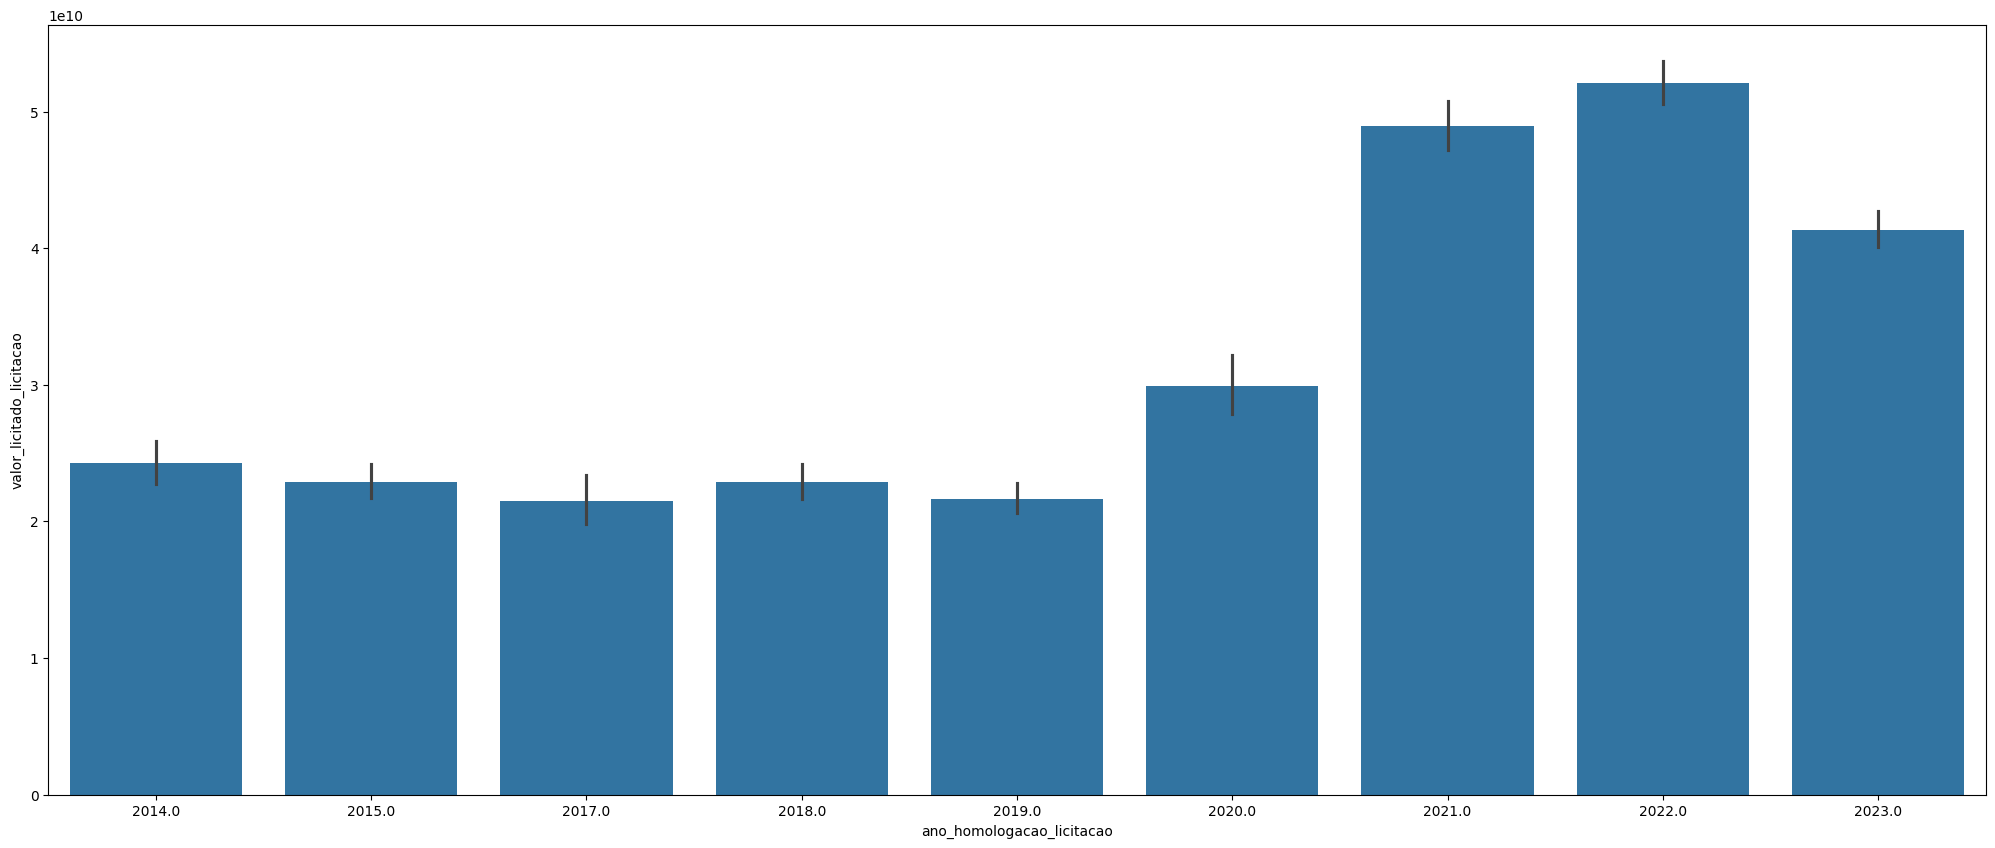

In [34]:
ax = sns.barplot(x = "ano_homologacao_licitacao", y = "valor_licitado_licitacao", data = licitacoes, estimator = "sum")
ax.figure.set_size_inches(25,10)

In [1]:
licitacoes_st

NameError: name 'licitacoes_st' is not defined